## Step 1: Import Required Libraries

In this step, we import all the necessary Python libraries for data handling, clustering, visualization, and evaluation. These include:
- `pandas` and `numpy` for data operations
- `seaborn` and `matplotlib` for visualizations
- `scikit-learn` for clustering, PCA, and evaluation
- `scipy` for hierarchical dendrograms


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## Step 2: Load the Dataset

We load the simulated healthcare wellness dataset, which includes features like:
- Daily exercise time
- Healthy meals per day
- Sleep hours per night
- Stress level score
- BMI

This dataset will be the foundation for our clustering and PCA analysis.


In [73]:
df = pd.read_csv("simulated_health_wellness_data.csv")
df.head()

,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
0,34.967142,5,7.618856,2,33.068556
1,28.617357,8,4.105473,7,27.267672
2,36.476885,4,6.024123,1,23.779217
3,45.230299,1,8.565319,8,29.820436
4,27.658466,3,8.301648,3,30.947352


## Step 3: Exploratory Data Analysis (EDA)

We perform EDA to understand relationships and correlations among variables:
- `Pairplot` to visualize distributions and feature pairings
- `Heatmap` to identify strong or weak correlations
- `describe()` to get summary statistics


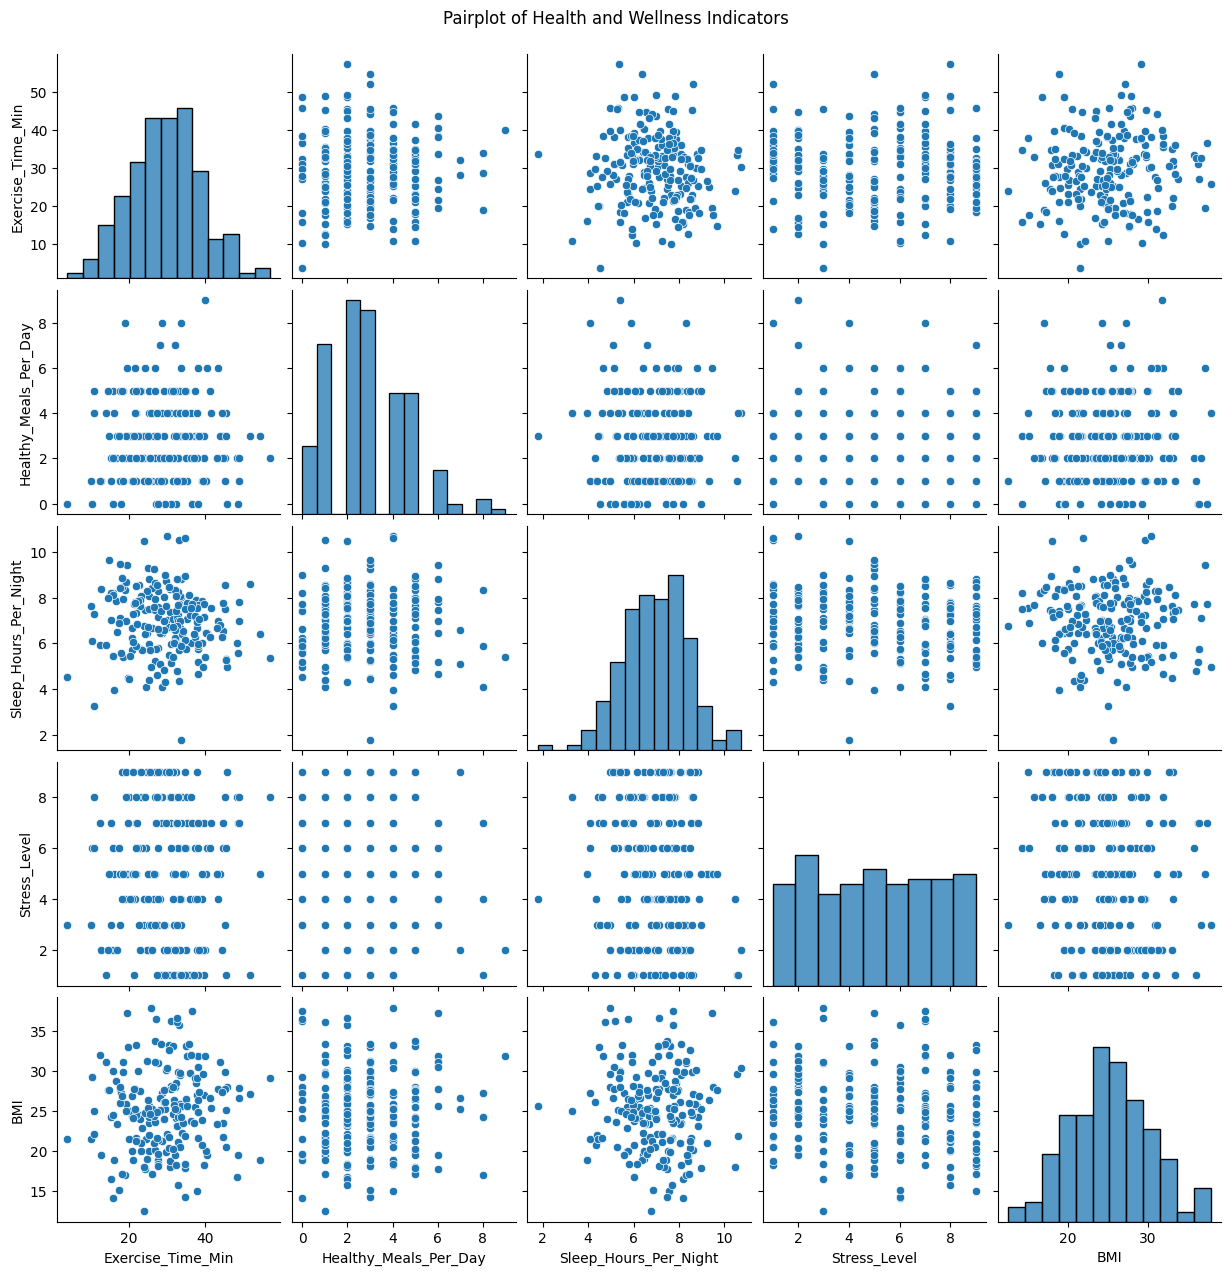

In [76]:
# Visualize relationships
sns.pairplot(df, diag_kind='hist')
plt.suptitle("Pairplot of Health and Wellness Indicators", y=1.02)
plt.show()

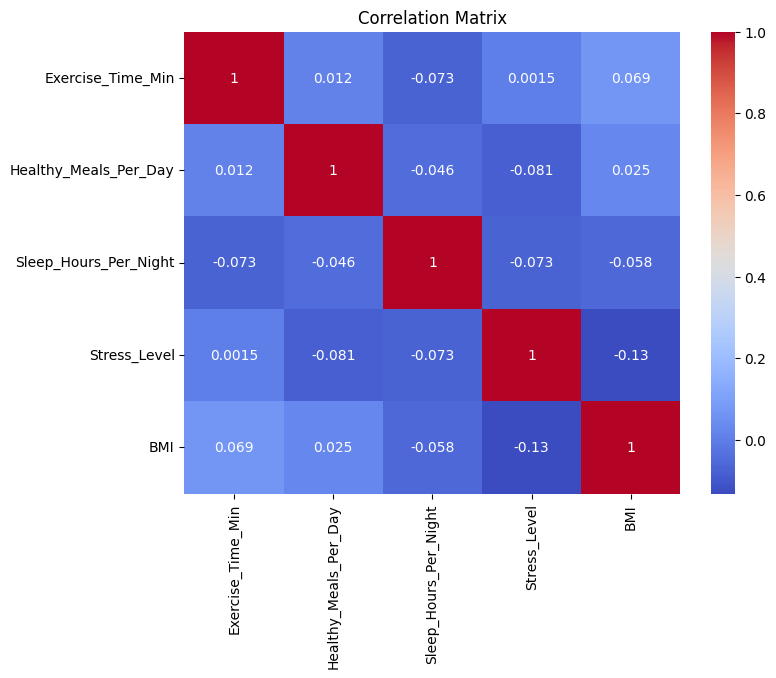

In [47]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [49]:
# Summary statistics
df.describe()

,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,29.592290,2.875000,6.933582,4.995000,25.150008
std,9.310039,1.815449,1.422471,2.605556,5.070778
min,3.802549,0.000000,1.778787,1.000000,12.502971
25%,22.948723,2.000000,5.967243,3.000000,21.458196
50%,29.958081,3.000000,6.972331,5.000000,25.155662
75%,35.008525,4.000000,7.886509,7.000000,28.011155
max,57.201692,9.000000,10.708419,9.000000,37.898547


## Step 4: Feature Scaling

We scale the dataset using `StandardScaler` so that all features contribute equally to distance-based models like K-Means and Hierarchical Clustering. This is a crucial preprocessing step.


In [81]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


## Step 5: Clustering Model Development

###  K-Means Clustering
We use the **Elbow Method** to determine the optimal number of clusters (`k`) by plotting Within-Cluster Sum of Squares (WCSS).  
Then, we apply **K-Means** with the chosen `k=3`.

###  Hierarchical Clustering
We generate a **Dendrogram** to visualize hierarchical relationships and apply **Agglomerative Clustering** with 3 clusters.

Both models are evaluated using the **Silhouette Score**.


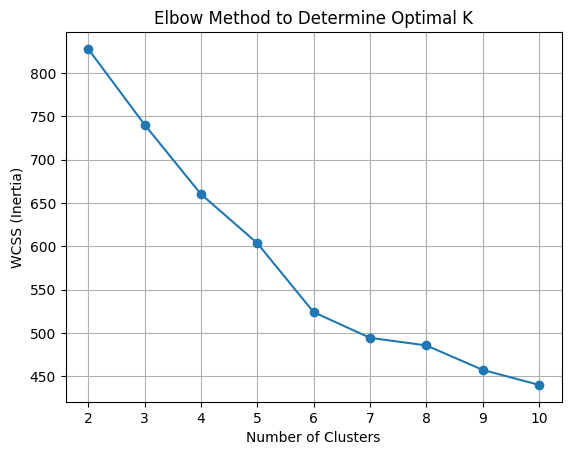

In [87]:
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow
plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()


In [55]:
# Apply Final KMeans Model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
print("Silhouette Score (KMeans on original data):", silhouette_score(X_scaled, kmeans_labels))


Silhouette Score (KMeans on original data): 0.1516159911787657


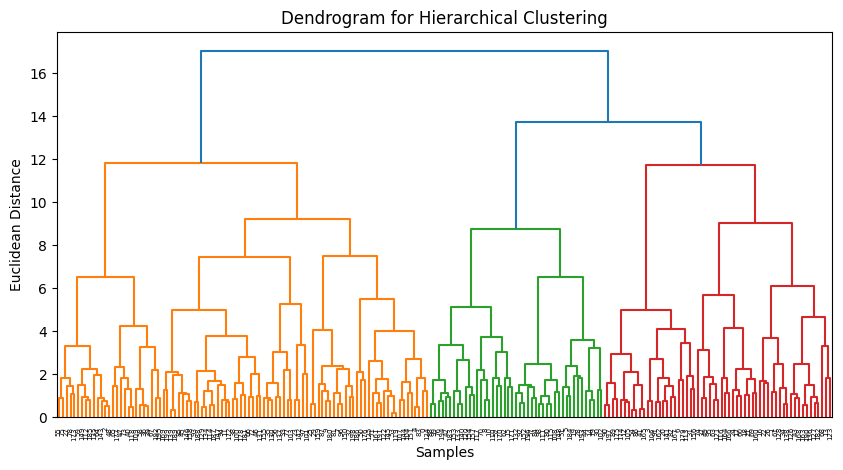

Silhouette Score (Hierarchical): 0.13628495765267165


In [57]:
# Hierarchical Clustering
# Dendrogram to visualize hierarchy
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_cluster.fit_predict(X_scaled)
print("Silhouette Score (Hierarchical):", silhouette_score(X_scaled, agg_labels))


## Step 6: PCA for Dimensionality Reduction

We apply **Principal Component Analysis (PCA)** to reduce the dataset from multiple dimensions down to 2. This:
- Simplifies visualization
- Helps us assess how well clusters can be separated in a lower-dimensional space

We also print the **explained variance ratio** to understand how much information is retained.


In [89]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained Variance
print("Explained Variance by PCA:", pca.explained_variance_ratio_)


Explained Variance by PCA: [0.23691549 0.22082517]


## Step 7: Visualizations of Cluster Results

### KMeans clusters (Original Data) visualized with PCA
We plot the 2D PCA components and color points by the KMeans labels from the original (scaled) dataset.

### KMeans clusters on PCA-reduced data
We also run KMeans directly on the PCA-reduced dataset and visualize those results to compare clustering effectiveness visually.


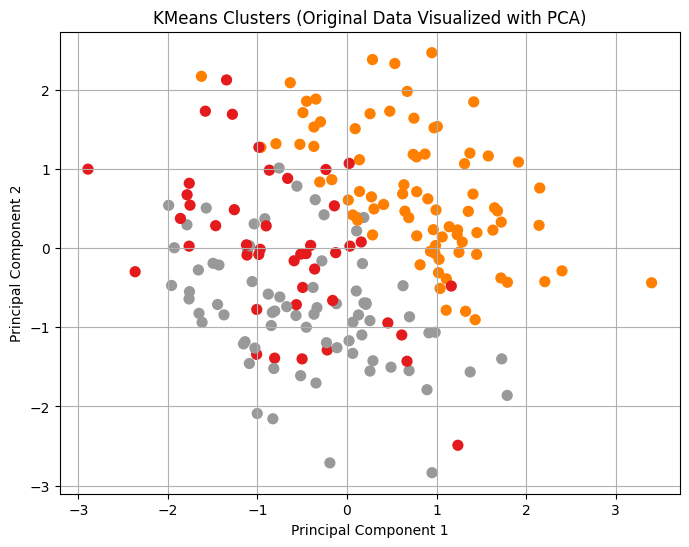

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='Set1', s=50)
plt.title("KMeans Clusters (Original Data Visualized with PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


Silhouette Score (KMeans on PCA data): 0.3625606718282872


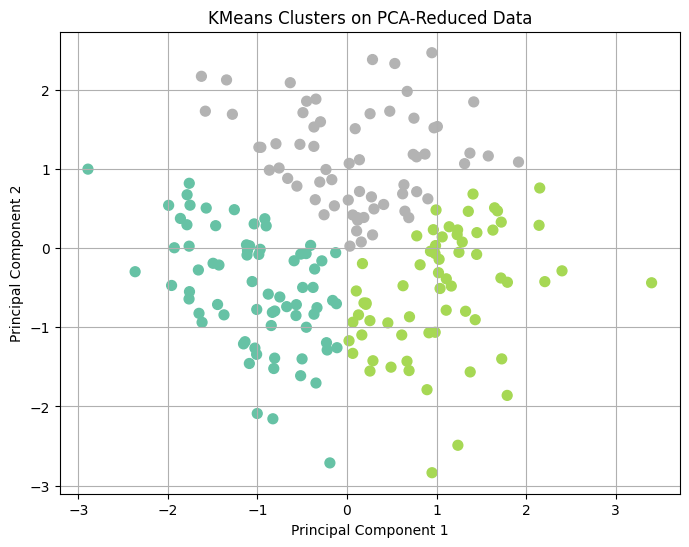

In [63]:
# Apply KMeans directly on PCA data and visualize
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_labels = kmeans_pca.fit_predict(X_pca)
print("Silhouette Score (KMeans on PCA data):", silhouette_score(X_pca, pca_labels))

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pca_labels, cmap='Set2', s=50)
plt.title("KMeans Clusters on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


## Step 8: Final Cluster Summary Table

We assign the KMeans cluster labels back to the original dataset, then group by cluster to calculate the **average wellness indicators** per group.  
This table gives actionable insights into each cluster’s health behavior profile.


In [94]:
df['KMeans_Cluster'] = kmeans_labels
cluster_summary = df.groupby('KMeans_Cluster').mean().round(2)
print("Final Cluster Summary Table:")
display(cluster_summary)


Final Cluster Summary Table:


,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
KMeans_Cluster,,,,,
0,20.88,1.70,6.17,5.14,23.23
1,30.15,3.41,7.39,2.67,27.12
2,34.15,2.97,6.89,7.49,24.10


## Step 9: Silhouette Score Comparison Table

We summarize the **Silhouette Scores** for:
- KMeans on original data
- Hierarchical clustering
- KMeans on PCA-reduced data

This allows us to compare and determine which model performs best in terms of cluster cohesion and separation.


In [96]:
# Recompute Silhouette Scores (for clarity)
score_kmeans = silhouette_score(X_scaled, kmeans_labels)
score_hierarchical = silhouette_score(X_scaled, agg_labels)
score_kmeans_pca = silhouette_score(X_pca, pca_labels)

# Create a summary DataFrame
silhouette_summary = pd.DataFrame({
    'Clustering Model': ['KMeans (original)', 'Hierarchical', 'KMeans on PCA'],
    'Silhouette Score': [score_kmeans, score_hierarchical, score_kmeans_pca]
})

# Display table
print("📊 Silhouette Score Comparison Table:")
display(silhouette_summary.round(4))


📊 Silhouette Score Comparison Table:


,Clustering Model,Silhouette Score
0,KMeans (original),0.1516
1,Hierarchical,0.1363
2,KMeans on PCA,0.3626
